In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import seaborn as sns

In [16]:
# Load the dataset
df = pd.read_csv('/content/Breast_Cancer.csv')
df.head()


,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0


In [17]:
df.tail()

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
694,776715,3,1,1,1,3,2.0,1,1,1,0
695,841769,2,1,1,1,2,1.0,1,1,1,0
696,888820,5,10,10,3,7,3.0,8,10,2,1
697,897471,4,8,6,4,3,4.0,10,6,1,1
698,897471,4,8,8,5,4,5.0,10,4,1,1


In [18]:
X = df.drop("Class", axis=1)
Y = df["Class"]
imputer = SimpleImputer(strategy='mean')

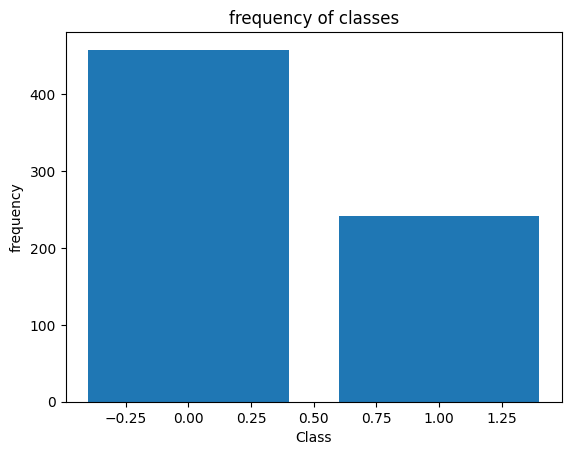

In [22]:
import matplotlib.pyplot as plt
class_counts =df['Class'].value_counts()
plt.bar(class_counts.index,class_counts.values)
plt.xlabel('Class')
plt.ylabel('frequency')
plt.title('frequency of classes')
plt.show()
#bar chart

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [24]:
# Perform feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Fit and transform the imputer on the training set
X_train_scaled = imputer.fit_transform(X_train_scaled)

In [ ]:
# Transform the testing set using the fitted imputer
X_test_scaled = imputer.transform(X_test_scaled)

In [ ]:
# Train a Logistic Regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_scaled, Y_train)
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train_scaled, Y_train)

In [ ]:
# Train a KNN Classification model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, Y_train)

In [ ]:
# Display the coefficients and form the logistic regression equation
coefficients = logistic_regression_model.coef_
intercept = logistic_regression_model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

In [ ]:

# Compute accuracy and confusion matrix for Logistic Regression model
logistic_regression_predictions = logistic_regression_model.predict(X_test_scaled)
logistic_regression_accuracy = accuracy_score(Y_test, logistic_regression_predictions.round())
logistic_regression_confusion_matrix = confusion_matrix(Y_test, logistic_regression_predictions.round())
print("Logistic Regression Accuracy:", logistic_regression_accuracy)
print("Logistic Regression Confusion Matrix:")
print(logistic_regression_confusion_matrix)

In [ ]:
# Compute accuracy and confusion matrix for KNN Classification model
knn_predictions = knn_model.predict(X_test_scaled)
knn_accuracy = accuracy_score(Y_test, knn_predictions)
knn_confusion_matrix = confusion_matrix(Y_test, knn_predictions)
print("KNN Classification Accuracy:", knn_accuracy)
print("KNN Classification Confusion Matrix:")
print(knn_confusion_matrix)

In [ ]:

# Make predictions on the test set
linear_regression_predictions = linear_regression_model.predict(X_test_scaled)

In [ ]:

# Compute mean squared error and R-squared score
linear_regression_mse = mean_squared_error(Y_test, linear_regression_predictions)
linear_regression_r2 = r2_score(Y_test, linear_regression_predictions)

print("Linear Regression Mean Squared Error:", linear_regression_mse)
print("Linear Regression R-squared Score:", linear_regression_r2)